In [24]:
#  import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('./data-collection/Diabetes/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**EDA**

In [4]:
# check for descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# check basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [26]:
# Assuming 'df' is your DataFrame
unique_values = df['smoking_history'].unique()
print(unique_values)
# Assuming 'df' is your DataFrame
unique_values1 = df['gender'].unique()
print(unique_values1)

['never' 'No Info' 'current' 'former' 'ever' 'not current']
['Female' 'Male' 'Other']


In [27]:
df=df.drop(df[df["gender"]=="Other"].index)

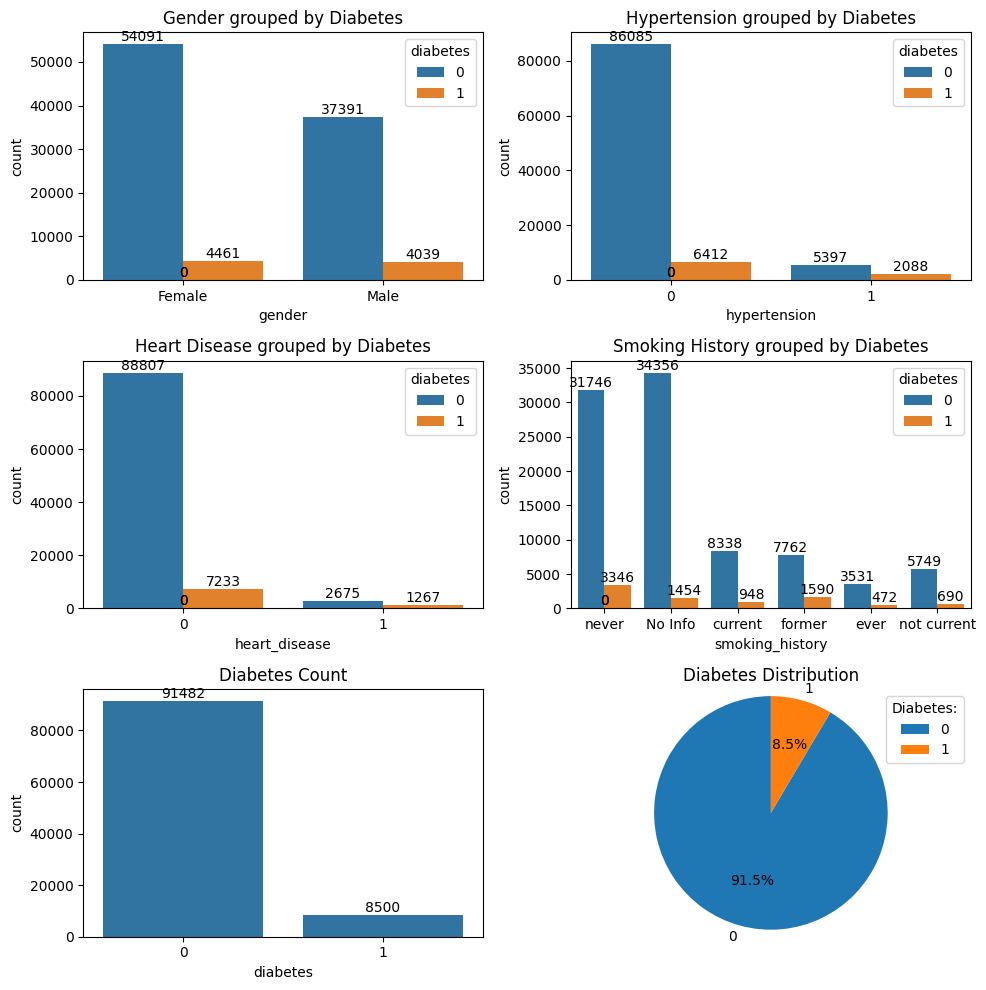

In [8]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Preprocessing**

In [29]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [12]:
# Assuming 'df' is your DataFrame
unique_values = df['smoking_history'].unique()
print(unique_values)
# Assuming 'df' is your DataFrame
unique_values1 = df['gender'].unique()
print(unique_values1)

[4 0 1 3 2 5]
[0 1]


In [30]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [32]:
# Assuming 'df' is your DataFrame
diabetes_df = df.loc[df['diabetes'] == 1]
diabetes_df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0,44.0,0,0,4,19.31,6.5,200,1
26,1,67.0,0,1,5,27.32,6.5,200,1
38,1,50.0,1,0,1,27.32,5.7,260,1
40,1,73.0,0,0,3,25.91,9.0,160,1
53,0,53.0,0,0,3,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,0,65.0,1,1,4,33.55,8.2,140,1
99938,1,55.0,0,1,3,30.42,6.2,300,1
99957,0,61.0,0,0,0,34.45,6.5,280,1
99962,0,58.0,1,0,4,38.31,7.0,200,1


**Feature Engineering**

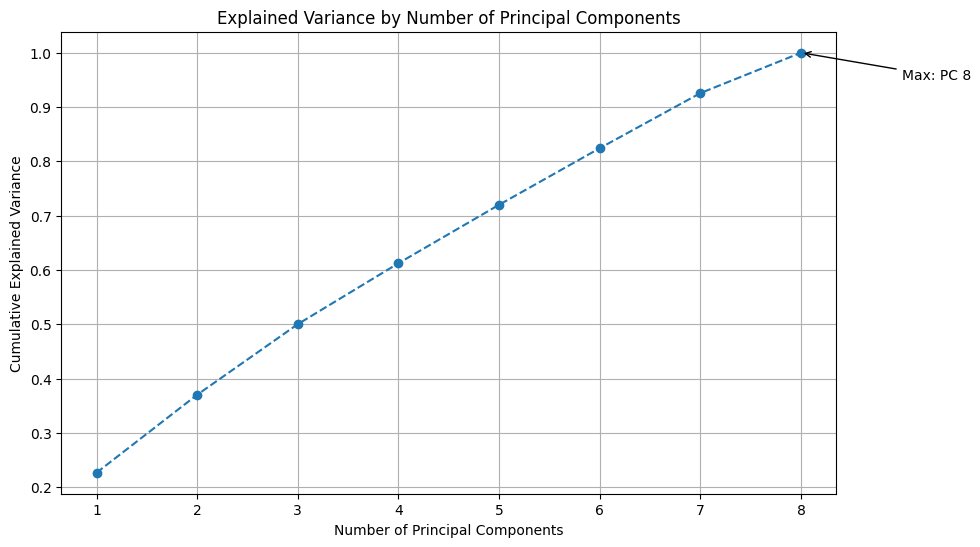

Principal Component 1: 0.2268 cumulative explained variance
Principal Component 2: 0.3703 cumulative explained variance
Principal Component 3: 0.5003 cumulative explained variance
Principal Component 4: 0.6124 cumulative explained variance
Principal Component 5: 0.7201 cumulative explained variance
Principal Component 6: 0.8243 cumulative explained variance
Principal Component 7: 0.9256 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [68]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

**Model Development**

In [69]:
# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [70]:
print(X_res.shape, y_res.shape)

(146520, 8) (146520,)


**1. Random Forest Classifier**

In [71]:
# Train a classifier on the balanced data
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

Random Forest Model Accuracy: 0.9579
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18222
           1       0.78      0.74      0.76      1775

    accuracy                           0.96     19997
   macro avg       0.88      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997



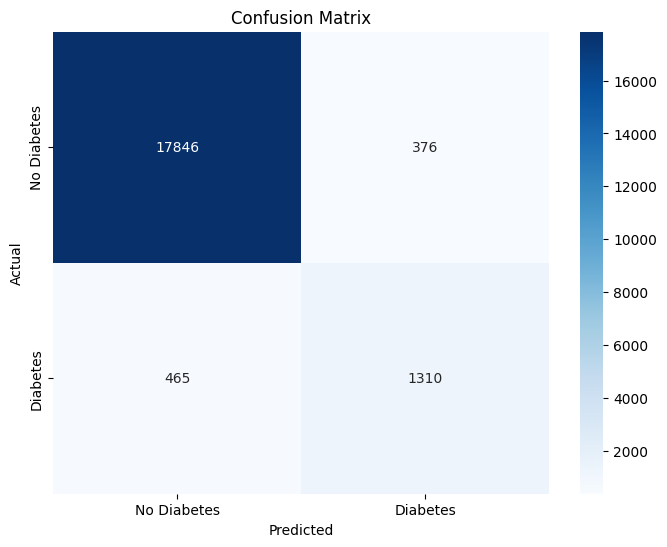

In [72]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy:.4f}')

# Evaluate the classifier
print(classification_report(y_test, y_pred_rf))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2. Extreme Gradient Boosting Classifier (XG Boost)**

In [73]:
# Initializing and training the XGBoost model
xgb_model = XGBClassifier(class_weight='balanced', random_state=42)
xgb_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

XGBoost Accuracy: 0.9650
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.87      0.71      0.78      1775

    accuracy                           0.96     19997
   macro avg       0.92      0.85      0.88     19997
weighted avg       0.96      0.96      0.96     19997



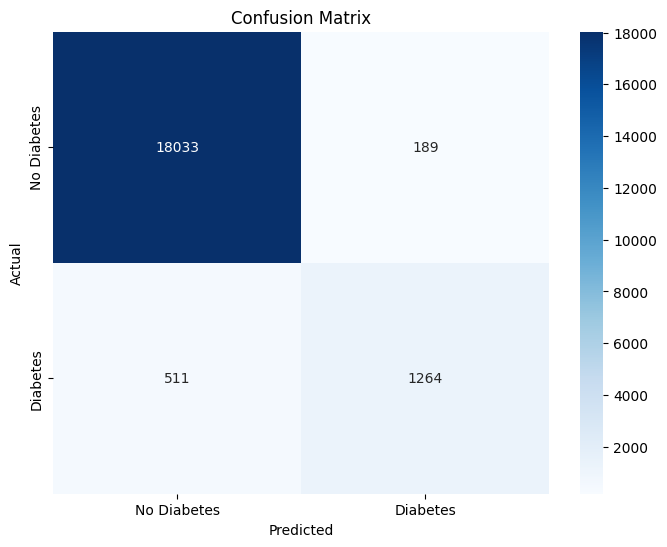

In [74]:
# Making predictions
y_pred_xg = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_xg)
print(f'XGBoost Accuracy: {accuracy:.4f}')

print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred_xg)}')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xg)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

In [75]:
from sklearn.linear_model import LogisticRegression

# Train a classifier on the balanced data with class weights
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_res, y_res)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Logistic Regression Model Accuracy: 0.8854
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18222
           1       0.43      0.86      0.57      1775

    accuracy                           0.89     19997
   macro avg       0.71      0.88      0.75     19997
weighted avg       0.94      0.89      0.90     19997



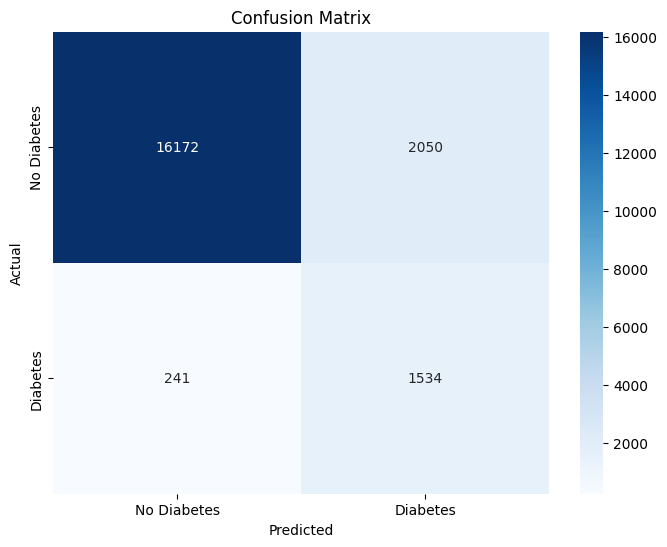

In [76]:
# Predict on the test data
y_pred_log = log_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')

# Evaluate the classifier
print(classification_report(y_test, y_pred_log))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
from sklearn.svm import SVC

# Train a classifier on the balanced data with class weights
svc_model = SVC(class_weight='balanced', random_state=42)
svc_model.fit(X_res, y_res)

SVC(class_weight='balanced', random_state=42)

SVM Accuracy: 0.8738
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     18222
           1       0.41      0.92      0.56      1775

    accuracy                           0.87     19997
   macro avg       0.70      0.90      0.75     19997
weighted avg       0.94      0.87      0.89     19997



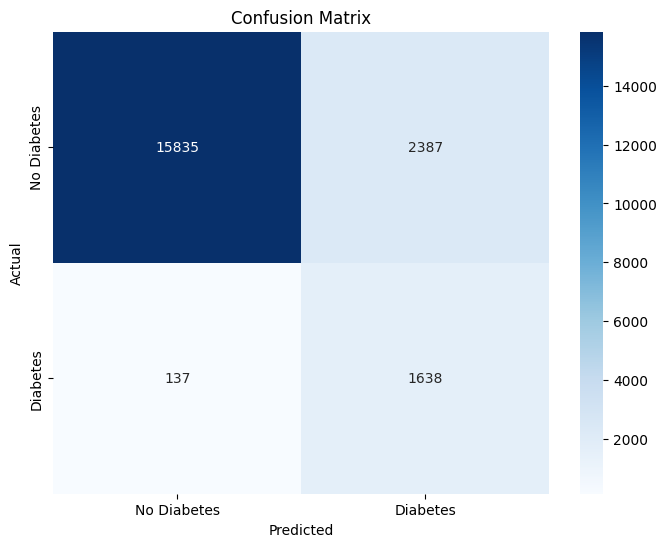

In [78]:
# Predict on the test data
y_pred_svc = svc_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'SVM Accuracy: {accuracy:.4f}')

# Evaluate the classifier
print(classification_report(y_test, y_pred_svc))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
import pickle

In [17]:
filename = './trained-model/di_version_1.pkl'
with open(filename, 'rb') as file:
    xgb_model = pickle.load(file)

In [18]:
features_for_prediction = {
    'gender': 'Female',
    'age': 44,
    'hypertension': 0,
    'heart_disease': 0,
    'smoking_history': 'never',
    'bmi': 19.31,
    'HbA1c_level': 6.5,
    'blood_glucose_level': 200
}

# Create a DataFrame with the input features
features_df = pd.DataFrame([features_for_prediction])

# Example of how to encode categorical variables and scale numerical variables
features_df['gender'] = le.fit_transform(features_df['gender'])
features_df['smoking_history'] = le.fit_transform(features_df['smoking_history'])



In [19]:
# Step 4: Make predictions
predictions = xgb_model.predict(features_df)

# Print or use predictions as needed
print("Predictions:", bool(predictions))

Predictions: False
